# EDA
Explore the color space of the images, at the end will be discovered.

* Check will color are similar to each other
* What attributes are representatives of each color
* Verify if features is normal distributed.


## Packages

In [10]:
from pathlib  import Path
import pandas as pd
import pyprojroot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Paths

In [3]:
root_path =  pyprojroot.here()
data_processed_folder = (root_path / "data"/'processed')

* Read dataframe

In [4]:
df = pd.read_csv(data_processed_folder/'pictures.csv')

## Inspect dataframe

In [6]:
df.describe()

,b_bgr_mean,g_bgr_mean,r_bgr_mean,h_hsv_mean,s_hsv_mean,v_hsv_mean,l_lab_mean,a_lab_mean,b_lab_mean,b_bgr_std,g_bgr_std,r_bgr_std,h_hsv_std,s_hsv_std,v_hsv_std,l_lab_std,a_lab_std,b_lab_std,index
count,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000,16311.000000
mean,88.562518,104.320254,115.244547,44.757007,101.677815,125.833029,112.543182,131.292713,138.968521,43.541036,45.857044,49.950760,30.433746,47.596255,47.837746,46.549118,8.016554,11.474257,8165.315063
std,46.991514,44.884307,45.970239,28.585814,41.647015,47.033807,45.130903,9.447764,12.528708,17.234010,15.383316,15.864959,18.001806,16.859403,15.040795,14.648113,5.548018,6.335095,4720.507435
min,1.719447,0.551342,3.557718,0.094689,0.000821,14.424922,8.323479,85.348392,74.034846,1.658205,0.849352,4.797930,0.519165,0.036974,3.973172,1.867568,0.000000,0.004587,0.000000
25%,50.735355,68.037886,79.664128,21.500999,72.663328,88.019296,76.606588,126.544998,132.443134,30.983045,35.195289,39.161896,15.849682,36.092367,37.697551,36.490425,4.173367,7.135976,4077.500000
50%,78.795156,99.416758,110.351822,35.415937,99.178078,124.869329,110.097046,130.334378,138.904006,41.767769,44.690731,49.116085,28.497717,46.342700,47.336775,45.620704,6.405536,10.066981,8159.000000
75%,121.101738,135.918578,146.016455,62.570007,128.157657,160.841375,144.690735,134.671555,145.831769,54.259380,55.179691,59.893537,42.317307,58.134285,57.375365,55.603774,10.130846,14.351203,12239.500000
max,242.331433,246.315693,252.507049,175.069186,254.542063,252.507049,246.765529,196.528596,205.006144,120.384983,113.409431,117.611042,87.644569,123.582951,110.898472,113.895517,44.177430,86.872675,16347.000000


* All features are between [0-255] what it is correct based in color space theory.

In [7]:
df.isnull().sum()

filename      0
b_bgr_mean    0
g_bgr_mean    0
r_bgr_mean    0
h_hsv_mean    0
s_hsv_mean    0
v_hsv_mean    0
l_lab_mean    0
a_lab_mean    0
b_lab_mean    0
b_bgr_std     0
g_bgr_std     0
r_bgr_std     0
h_hsv_std     0
s_hsv_std     0
v_hsv_std     0
l_lab_std     0
a_lab_std     0
b_lab_std     0
image         0
page          0
color         0
index         0
dtype: int64

Non null values :)

## EDA

In [76]:
def boxplot(df,channels:list[str],order_by,title='title'):
    df_by_channels = pd.melt(df, id_vars='color', value_vars=channels,var_name='channel')
    df_by_channels['channel'] = df_by_channels['channel'].str[0:1].str.capitalize()

    order_channel = df_by_channels[df_by_channels.channel == order_by] 
    myorder =order_channel.groupby(by=["color"]).median().reset_index().sort_values(by='value')['color']
    plt.figure(figsize=(15, 8))
    plt.title(title)
    sns.boxplot(data=df_by_channels, x="color", y="value", hue='channel',order=myorder,palette="crest")

def kdeplot(df,channels:list[str],title='title'):
    df_by_channels = pd.melt(df, id_vars='color', value_vars=channels,var_name='channel')
    df_by_channels['channel'] = df_by_channels['channel'].str[0:1].str.capitalize()
    sns.kdeplot(
        data=df_by_channels, x="value", hue="channel",
        fill=True, common_norm=False, palette="crest",
        alpha=.5, linewidth=0,
    )

/tmp/ipykernel_116370/1210595690.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  myorder =order_channel.groupby(by=["color"]).median().reset_index().sort_values(by='value')['color']


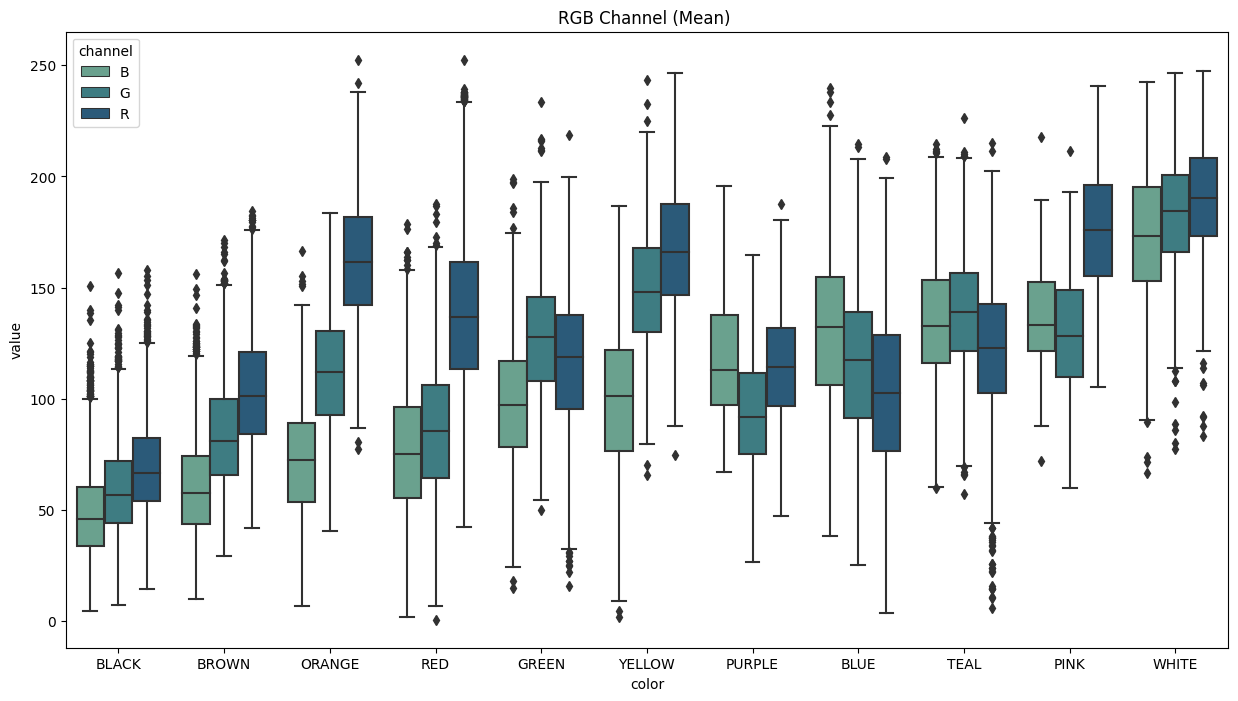

In [73]:
boxplot(df,['b_bgr_mean','g_bgr_mean','r_bgr_mean'],'B','RGB Channel (Mean) ')

/tmp/ipykernel_116370/1210595690.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  myorder =order_channel.groupby(by=["color"]).median().reset_index().sort_values(by='value')['color']


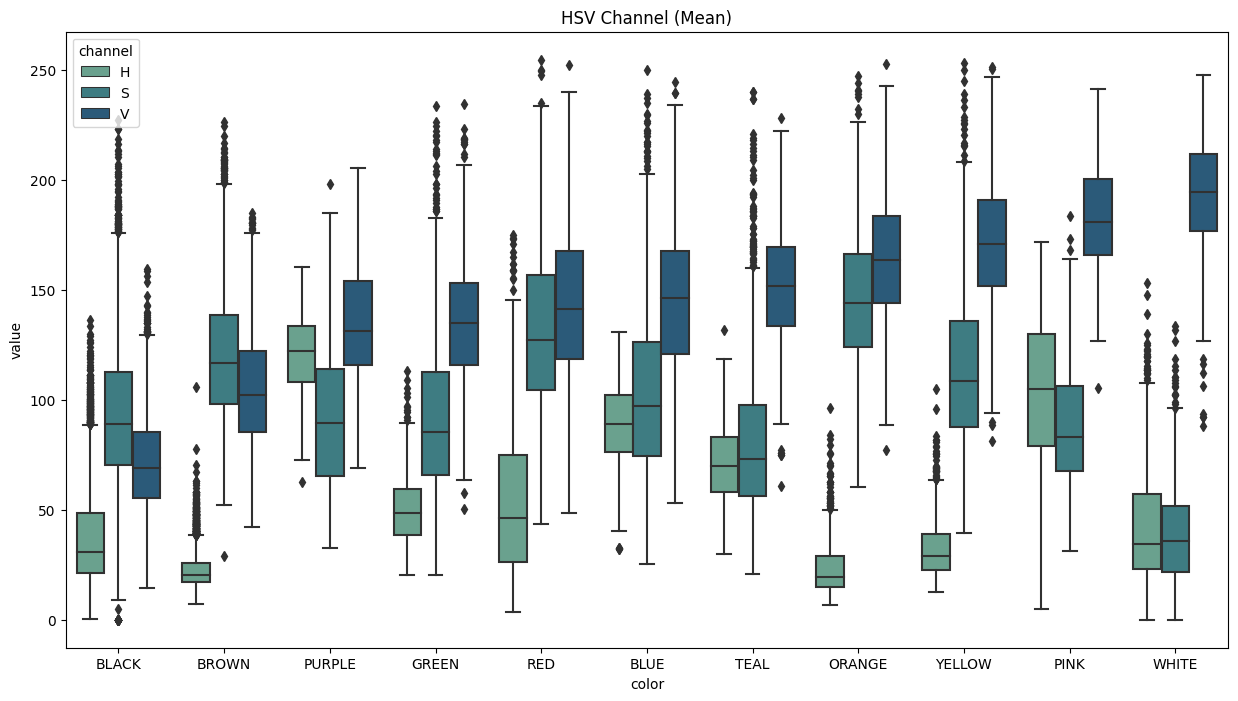

In [74]:
boxplot(df,['h_hsv_mean','s_hsv_mean','v_hsv_mean'],'V','HSV Channel (Mean)')

/tmp/ipykernel_116370/1210595690.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  myorder =order_channel.groupby(by=["color"]).median().reset_index().sort_values(by='value')['color']


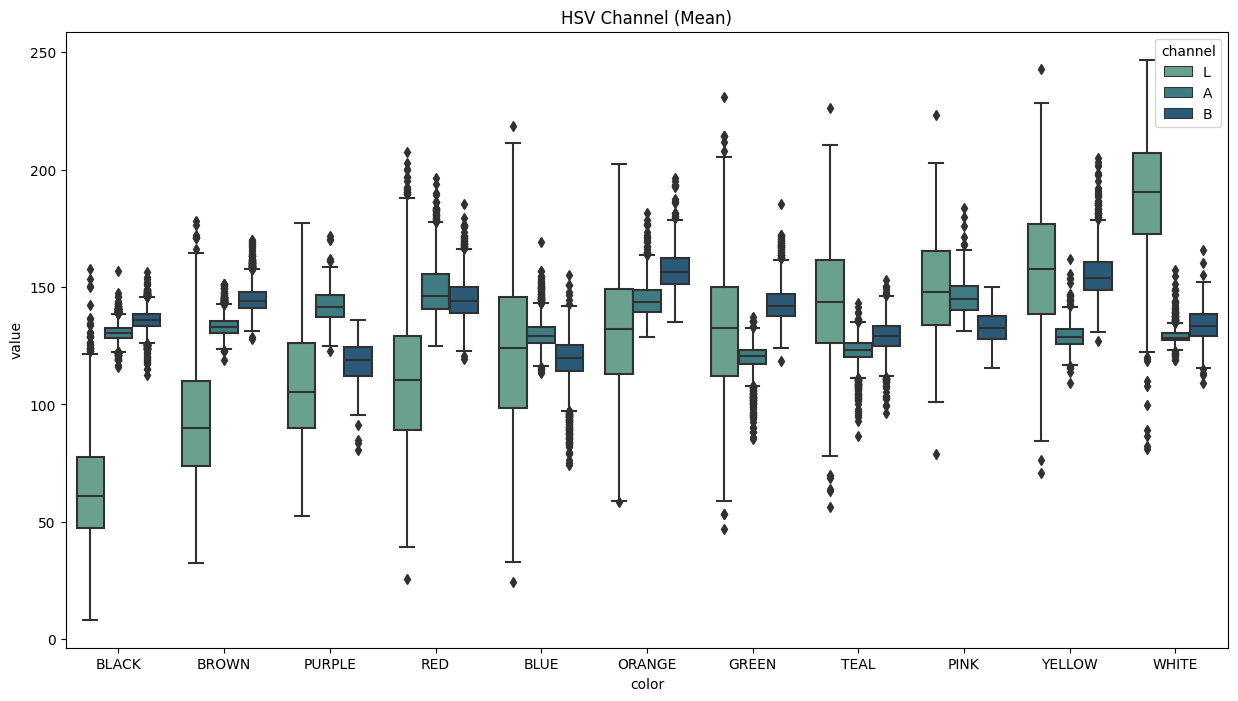

In [75]:
boxplot(df,['l_lab_mean','a_lab_mean','b_lab_mean'],'L','HSV Channel (Mean)')

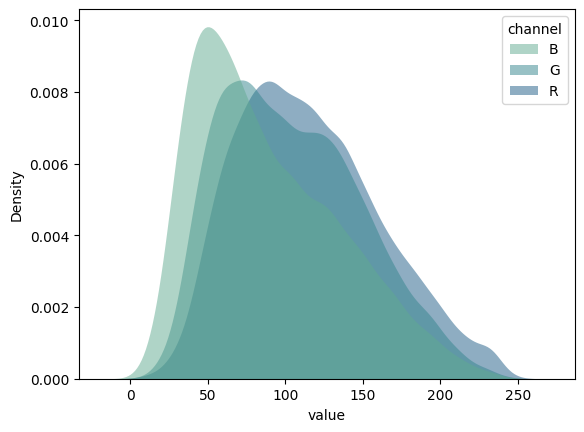

In [77]:
kdeplot(df,['b_bgr_mean','g_bgr_mean','r_bgr_mean'])

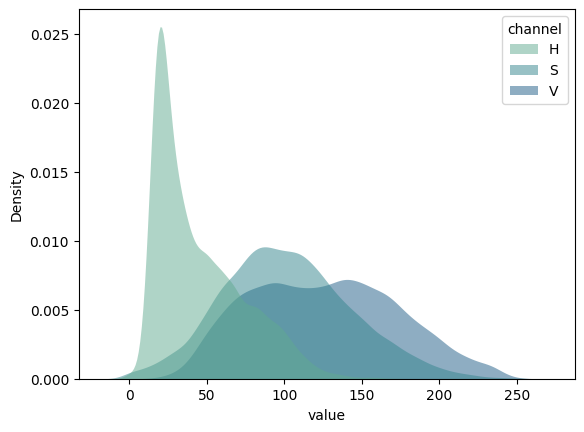

In [78]:
kdeplot(df,['h_hsv_mean','s_hsv_mean','v_hsv_mean'])

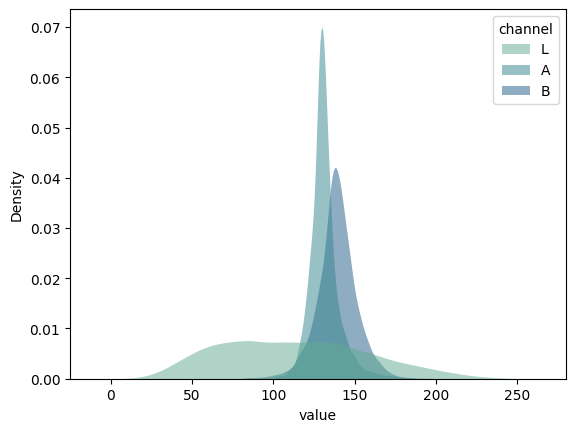

In [79]:
kdeplot(df,['l_lab_mean','a_lab_mean','b_lab_mean'])